In [1]:
# importing the dataset using Pandas 
import pandas as pd
dfp1 = pd.read_csv("googleplaystore.csv")
dfp2 = pd.read_csv("googleplaystore_user_reviews.csv")
df = pd.merge(dfp1, dfp2,on='App',how='inner')  #merging n datasets tutorial 
                                                #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [2]:
df.shape #dfp1.shape (10841, 13) #dfp2.shape (64295, 5)

(122662, 17)

In [3]:
#generale information about dataset!
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 17 columns):
App                       122662 non-null object
Category                  122662 non-null object
Rating                    122622 non-null float64
Reviews                   122662 non-null object
Size                      122662 non-null object
Installs                  122662 non-null object
Type                      122662 non-null object
Price                     122662 non-null object
Content Rating            122662 non-null object
Genres                    122662 non-null object
Last Updated              122662 non-null object
Current Ver               122662 non-null object
Android Ver               122662 non-null object
Translated_Review         72605 non-null object
Sentiment                 72615 non-null object
Sentiment_Polarity        72615 non-null float64
Sentiment_Subjectivity    72615 non-null float64
dtypes: float64(3), object(14)
memory usage: 16.8+ MB


In [4]:
#info about existing values in the dataset! such as (moyenne max min...)
df.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,122622.000000,72615.000000,72615.000000
mean,4.322405,0.157320,0.494162
std,0.284766,0.332652,0.240144
min,2.500000,-1.000000,0.000000
25%,4.200000,0.000000,0.380000
50%,4.400000,0.129167,0.509740
75%,4.500000,0.356250,0.633333
max,4.900000,1.000000,1.000000


# Data Propossing 

In [5]:
#data processing!
#1)get a summary on the number of missing values on each column: by using the isnull().sum() function
df.isnull().sum() 


App                           0
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

Sentiment : sentiment analysis refers to identifying "Sentiment Orientation" (positive, neutral, and negative) , in our case sentiment express Satisfaction or Dissatisfaction . 

Translated_Review : user's review of the App 

Sentiment_Polarity : The "Precision" in Sentiment Orientation (e.g. very positive, positive, neutral, negative, and very negative) 

Sentiment_Subjectivity : The "Rating" of Sentiment_Polarity (e.g. very positive>=0.5 ,positive>=0.1 , 0.099<=neutral<=-0.099 , negative <= -0.1 and very negative <=-0.5 ) 

Conclution : 
Sentiment_Polarity and Sentiment_Subjectivity drive us to better dession making more than Translated_Review and Sentiment , so droping these two last column would be more usefull in the dession making process

In [6]:
df.drop('Translated_Review', axis = 1,inplace=True)
df.drop('Sentiment', axis = 1,inplace=True) 
df.drop('App', axis = 1,inplace=True) 
df.drop('Last Updated', axis = 1,inplace=True) # because we dont have number of updated or when was the first upload of the app 
df.drop('Android Ver', axis = 1,inplace=True) #because if we deceided to build an app we will be building it for the future android ver 
df.drop('Current Ver', axis = 1,inplace=True) #app version wont affect user opinion on downloading or buying the app


In [7]:
df.isnull().sum()

Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

to make the dataset usefull in the predection / dession making process we need to get ride from all the categorical ( string ) values 

In [8]:
print( len(df['Category'].unique()) , "Category")

print("\n", df['Category'].unique())

33 Category

 ['ART_AND_DESIGN' 'FAMILY' 'AUTO_AND_VEHICLES' 'BEAUTY'
 'BOOKS_AND_REFERENCE' 'BUSINESS' 'COMMUNICATION' 'COMICS' 'DATING'
 'TOOLS' 'EDUCATION' 'ENTERTAINMENT' 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK'
 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE'
 'GAME' 'SPORTS' 'MEDICAL' 'SOCIAL' 'SHOPPING' 'PHOTOGRAPHY'
 'TRAVEL_AND_LOCAL' 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER'
 'VIDEO_PLAYERS' 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [9]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df 

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity
0,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,-0.250000,1.000000
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,-0.725000,0.833333
2,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
3,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
4,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000
5,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,-0.800000,0.900000
6,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
7,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
8,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,1.000000
9,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,24
paid_genres = sns.countplot(y="Genres",data=df, palette = "spring")
paid_genres.set_xticklabels(paid_genres.get_xticklabels(), rotation=10, ha="right")
paid_genres
plt.title('Top Genres for PAID APPS',size = 20)

Text(0.5, 1.0, 'Top Genres for PAID APPS')

Text(0.5, 1.0, 'Top Categories for PAID APPS')

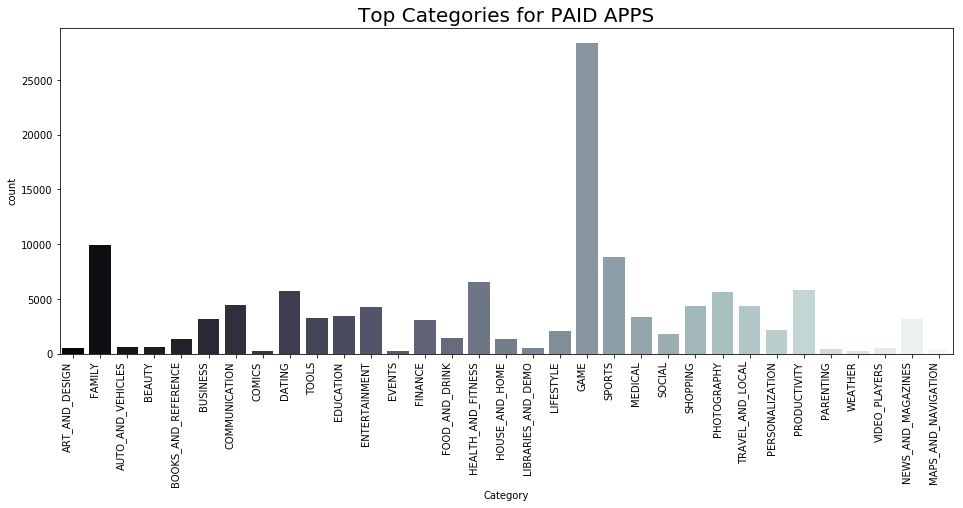

In [11]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,6

paid_categories = sns.countplot(x="Category",data=df, palette = "bone")
paid_categories.set_xticklabels(paid_categories.get_xticklabels(), rotation=90, ha="right")
paid_categories 
plt.title('Top Categories for PAID APPS',size = 20)

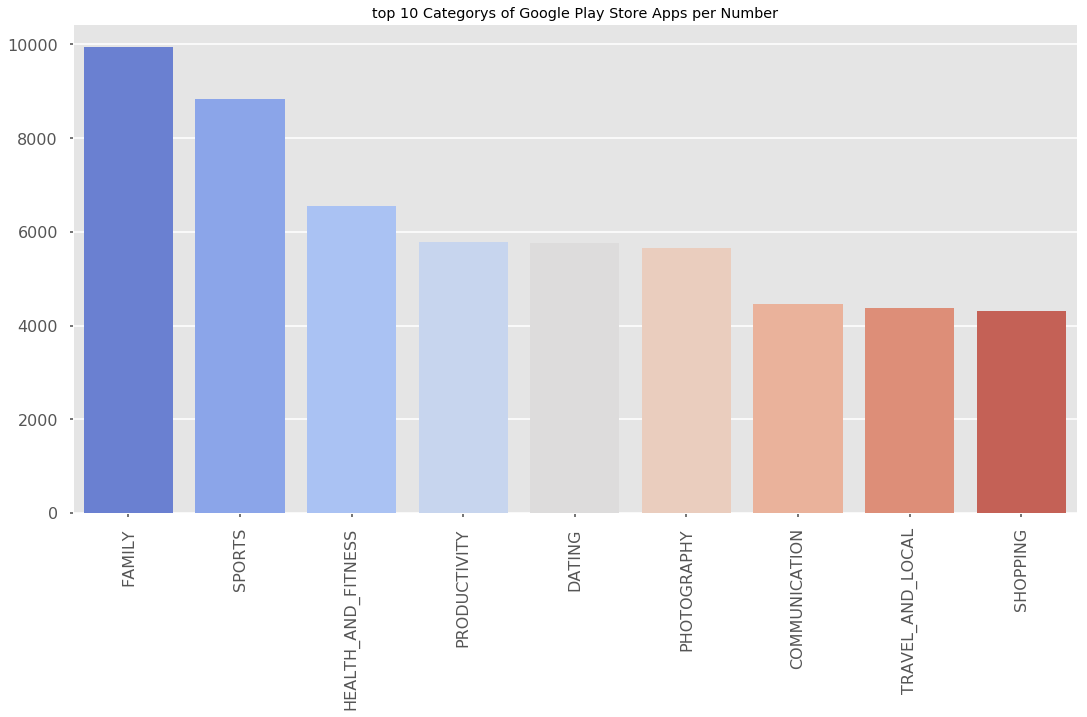

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.style as style 
style.available

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

sns.barplot(df['Category'].value_counts()[1:10].index,df['Category'].value_counts()[1:10].values,palette=('coolwarm'))
#.values-counts to calculate the number  of the apperience of each group in the df['Group'] column
#[1:20] to bringup the top 10 groups 
#.index to show the names of this groups and .values to show the number of the apperience of each group
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(18,9)
plt.title('top 10 Categorys of Google Play Store Apps per Number')
plt.show()



Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

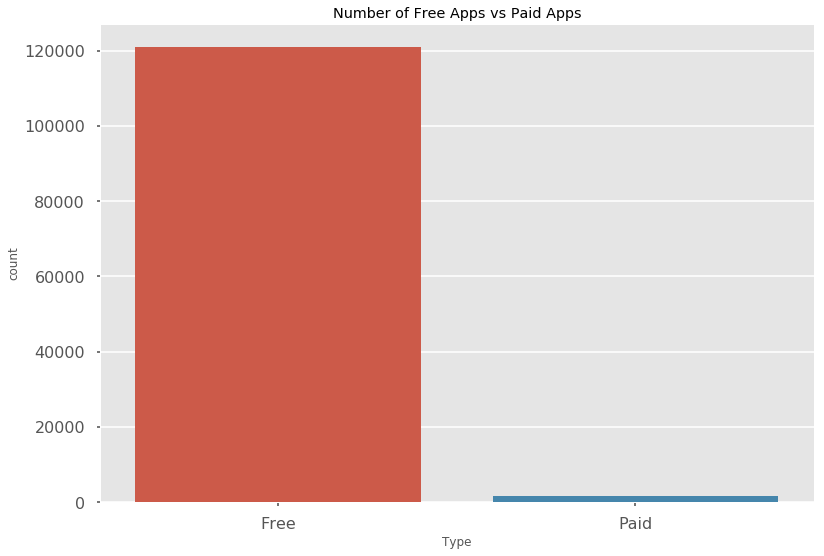

In [13]:
import seaborn as sns
sns.countplot(x='Type',data=df)

plt.title('Number of Free Apps vs Paid Apps')

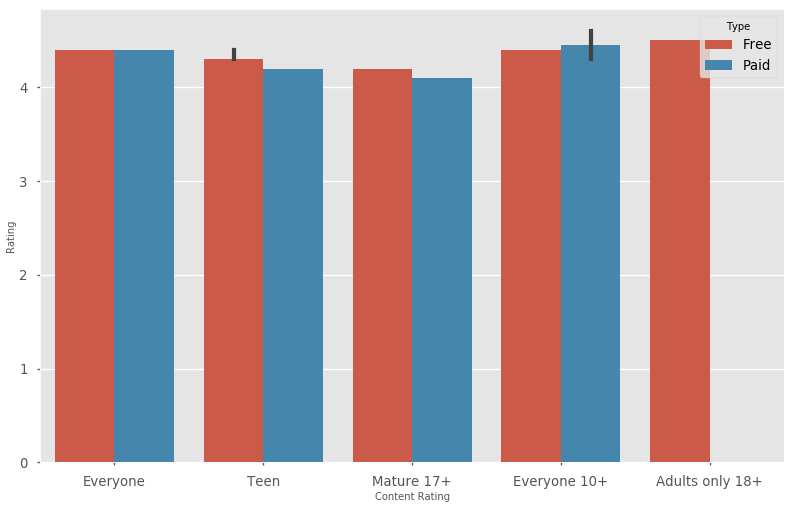

In [14]:
plt.figure(num=None, figsize=(16, 10), dpi=60, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='Content Rating', y='Rating', hue="Type", data=df, estimator=np.median)
plt.show()

Text(0.5, 1.0, 'Rating Distribution')

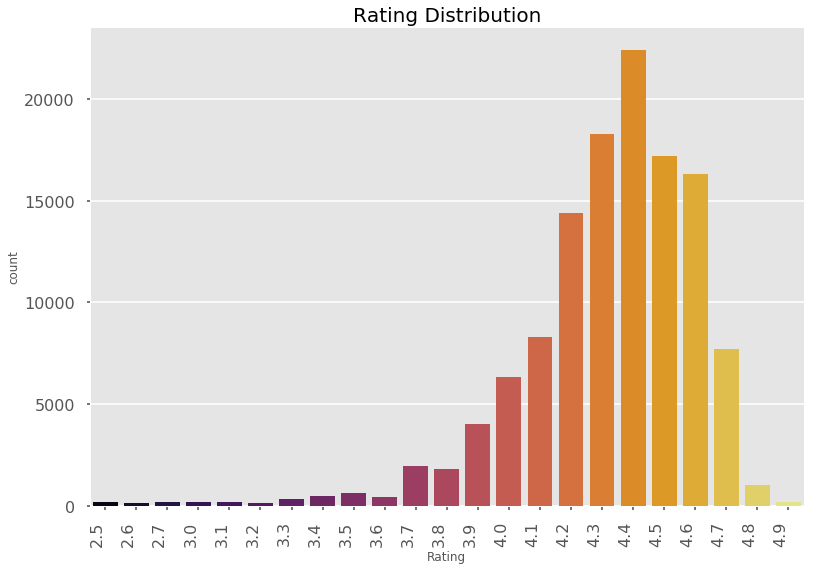

In [15]:
ratings_plot = sns.countplot(x="Rating",data=df, palette = "inferno")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Rating Distribution',size = 20)

conclution : we have " 1020  " differrent App from " 33 Category "

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Category']=encoder.fit_transform(df['Category'])
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity
0,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,-0.250000,1.000000
1,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,-0.725000,0.833333
2,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
3,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
4,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000
5,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,-0.800000,0.900000
6,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
7,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
8,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,1.000000
9,0,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000


In [17]:
df.Price.value_counts()

0.00     121108
3.99        360
11.99       320
9.99        200
33.99       160
0.99         80
2.49         80
3.95         80
6.99         80
1.99         40
4.99         40
2.99         40
29.99        40
7.99         34
Name: Price, dtype: int64

In [18]:
df['Category'].max()

32

conclution : 
we have " 1019 " differrent App from " 32 Category " 

we can see that installs is not numerical so we need to make it so ! , but how ?
simply by removing the "+" and "," 

In [19]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity
0,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.250000,1.000000
1,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.725000,0.833333
2,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
3,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
4,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000
5,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.800000,0.900000
6,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
7,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
8,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,1.000000
9,0,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000


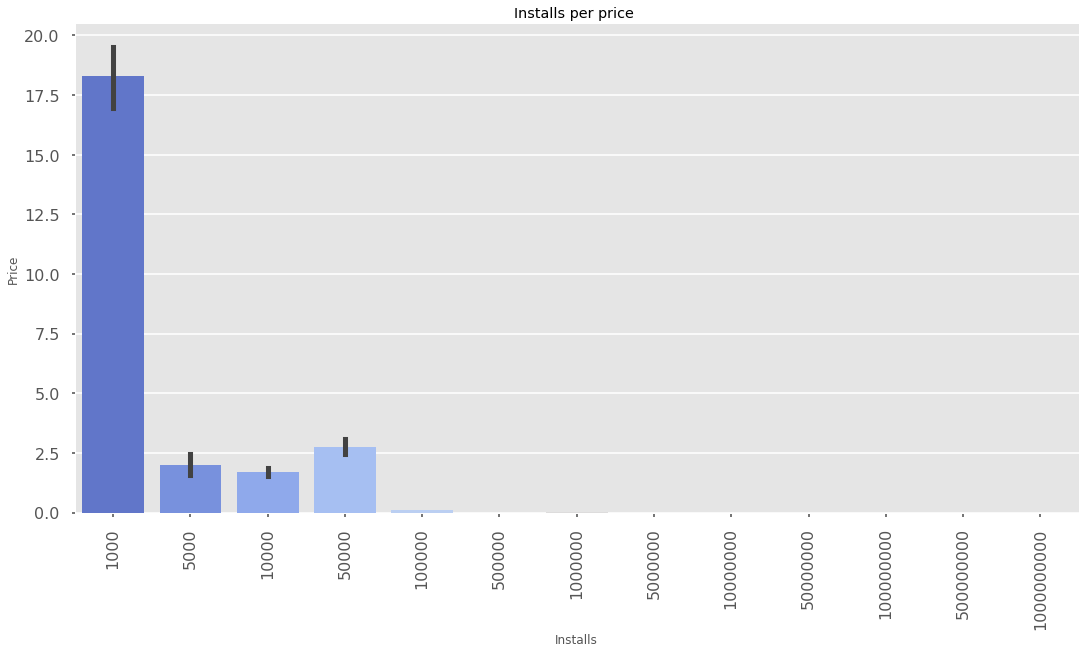

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.style as style 
style.available

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

sns.barplot(df['Installs'],df['Price'],palette=('coolwarm'))
#.values-counts to calculate the number  of the apperience of each group in the df['Group'] column
#[1:20] to bringup the top 10 groups 
#.index to show the names of this groups and .values to show the number of the apperience of each group
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(18,9)
plt.title('Installs per price ')
plt.show()



In [21]:
type(df['Installs'][1])

numpy.int64

we can also notice that the size column has string values so we need to convert all of them to numerical values too . but how ?
simply make all the values in MB (e.g : 14M==>14 , 960kB==>0.96 )
Note : in the 960KB exemple we need to devise the 960kb by 1000 
        alse make sure all values are floats 

In [22]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '-1') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))
df


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity
0,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.250000,1.000000
1,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.725000,0.833333
2,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
3,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
4,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000
5,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.800000,0.900000
6,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
7,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
8,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,1.000000
9,0,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000


In [23]:
df.drop('Type', axis = 1,inplace=True)
df

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity
0,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,-0.250000,1.000000
1,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,-0.725000,0.833333
2,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
3,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
4,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000
5,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,-0.800000,0.900000
6,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN
7,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,0.000000,0.000000
8,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,0.500000,1.000000
9,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,0.500000,0.600000


In [24]:
print( len(df['Content Rating'].unique()) , "Content Rating")

print("\n", df['Content Rating'].unique())

5 Content Rating

 ['Everyone' 'Teen' 'Mature 17+' 'Everyone 10+' 'Adults only 18+']


In [25]:
#replacing string with numerical values ( recommand using dic for better understanding)
CR={ "Content Rating" : {"Everyone": 1,"Teen":2,"Mature 17+":3 , "Everyone 10+" :4 , "Adults only 18+":5} }
df.replace(CR , inplace=True)
df

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity
0,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,-0.250000,1.000000
1,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,-0.725000,0.833333
2,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,0.000000,0.000000
3,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,NaN,NaN
4,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,0.500000,0.600000
5,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,-0.800000,0.900000
6,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,NaN,NaN
7,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,0.000000,0.000000
8,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,0.500000,1.000000
9,0,3.9,967,14.0,500000,0.0,1,Art & Design;Pretend Play,0.500000,0.600000


"Content Rating" : {"Everyone": 1,"Teen":2,"Mature 17+":3 , "Everyone 10+" :4 , "Adults only 18+":5}

In [26]:
type(df['Genres'][1]) #show the type of the values of feature ("colum") 'Genres'

str

In [27]:
print( len(df['Genres'].unique()) , "Genres") # calculate the number of different values of the Feature 'Genres'

print("\n", df['Genres'].unique()) #show all the unique non duplicated values of Feature 'Genres'

73 Genres

 ['Art & Design;Pretend Play' 'Art & Design' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Communication'
 'Comics' 'Dating' 'Tools' 'Education;Education' 'Education'
 'Entertainment' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Casual' 'Puzzle;Brain Games' 'Arcade' 'Casual;Pretend Play'
 'Strategy' 'Action' 'Puzzle' 'Sports' 'Casual;Creativity' 'Racing'
 'Simulation' 'Board' 'Adventure' 'Role Playing' 'Simulation;Education'
 'Action;Action & Adventure' 'Casual;Brain Games'
 'Simulation;Action & Adventure' 'Educational;Creativity'
 'Educational;Education' 'Educational;Pretend Play' 'Casual;Education'
 'Racing;Action & Adventure' 'Entertainment;Music & Video'
 'Educational;Brain Games' 'Casual;Action & Adventure'
 'Education;Pretend Play' 'Simulation;Pretend Play'
 'Sports;Action & Adventure' 'Role Playing;Action & Adventure'
 'Arcade;Action & Adventure'

In [28]:
df['Genres'].value_counts() # calculating all the exisiting number of every unique value of the Feature 'Genres'

Sports                                   10920
Action                                    8580
Health & Fitness                          6562
Casual                                    5800
Productivity                              5780
Dating                                    5756
Photography                               5660
Entertainment                             5060
Arcade                                    4940
Communication                             4460
Travel & Local                            4340
Shopping                                  4320
Puzzle                                    3560
Medical                                   3394
Tools                                     3239
News & Magazines                          3200
Business                                  3160
Finance                                   3080
Education                                 2629
Education;Education                       2340
Personalization                           2200
Lifestyle    

In [29]:
#transforming all the unique values of the Feature 'Genres' to a correspanding Number
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Genres']=encoder.fit_transform(df['Genres'])
df

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity
0,0,3.9,967,14.0,500000,0.0,1,7,-0.250000,1.000000
1,0,3.9,967,14.0,500000,0.0,1,7,-0.725000,0.833333
2,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000
3,0,3.9,967,14.0,500000,0.0,1,7,NaN,NaN
4,0,3.9,967,14.0,500000,0.0,1,7,0.500000,0.600000
5,0,3.9,967,14.0,500000,0.0,1,7,-0.800000,0.900000
6,0,3.9,967,14.0,500000,0.0,1,7,NaN,NaN
7,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000
8,0,3.9,967,14.0,500000,0.0,1,7,0.500000,1.000000
9,0,3.9,967,14.0,500000,0.0,1,7,0.500000,0.600000


In [30]:
df.isnull().sum()

Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Price                         0
Content Rating                0
Genres                        0
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

we still have so many Sentiment_Polarity with NaN values so i deceided to transforme all the NaNs to 0.00000 in both Sentiment_Polarity and Sentiment_Subjectivity which means Neutral Sentiments 


In [31]:
df["Sentiment_Subjectivity"].fillna(0.000000, inplace = True)
df["Sentiment_Polarity"].fillna(0.000000, inplace = True)
df

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity
0,0,3.9,967,14.0,500000,0.0,1,7,-0.250000,1.000000
1,0,3.9,967,14.0,500000,0.0,1,7,-0.725000,0.833333
2,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000
3,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000
4,0,3.9,967,14.0,500000,0.0,1,7,0.500000,0.600000
5,0,3.9,967,14.0,500000,0.0,1,7,-0.800000,0.900000
6,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000
7,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000
8,0,3.9,967,14.0,500000,0.0,1,7,0.500000,1.000000
9,0,3.9,967,14.0,500000,0.0,1,7,0.500000,0.600000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 10 columns):
Category                  122662 non-null int32
Rating                    122622 non-null float64
Reviews                   122662 non-null int64
Size                      122662 non-null float64
Installs                  122662 non-null int64
Price                     122662 non-null float64
Content Rating            122662 non-null int64
Genres                    122662 non-null int32
Sentiment_Polarity        122662 non-null float64
Sentiment_Subjectivity    122662 non-null float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 14.4 MB


In [33]:
df["Category"].max()

32

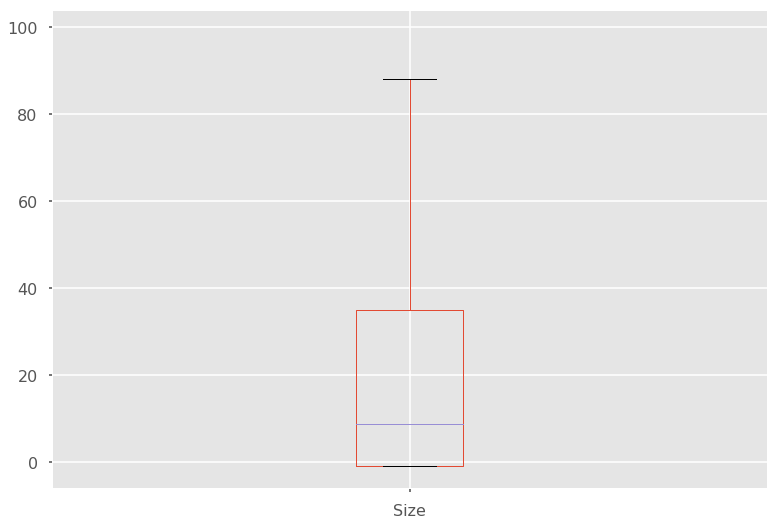

In [34]:
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
df["Size"].plot.box()

50% of App sizes are 25MB 

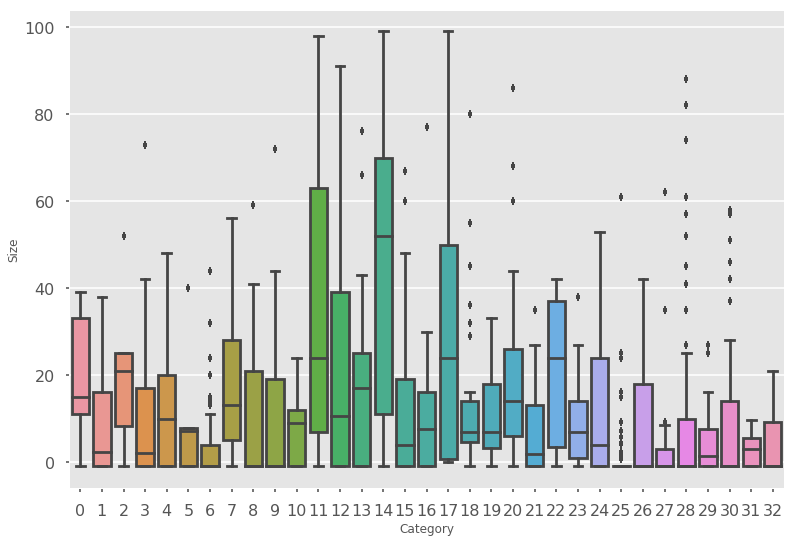

In [35]:
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
#df.assign(index=df.groupby('Category').cumcount()).pivot('','category','duration').plot(kind='box')
sns.boxplot(data=df, x='Category', y='Size')

In [36]:
df[(df['Category'] == 0)]['Size'].median()

15.0

In [37]:
len(df.Size)

122662

In [38]:
newS=[]
for j in range(0,len(df.Size)):
    if (df.Size[j] == -1): # -1 means no information about the size of the App Whitch also mean -1==NaN
        newS.append(df[(df['Category'] == df['Category'][j])]['Size'].median())
    else : 
        newS.append(df.Size[j])
# what i did was insering all apps with an available size execept these with 'NaN' in a new Feature that i ll be adding
# it to the DataFrame Called newS so that we can find ONLY the Apps with the available size information
        

In [39]:
df['NSize']= newS 

In [40]:
df

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,NSize
0,0,3.9,967,14.0,500000,0.0,1,7,-0.250000,1.000000,14.0
1,0,3.9,967,14.0,500000,0.0,1,7,-0.725000,0.833333,14.0
2,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000,14.0
3,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000,14.0
4,0,3.9,967,14.0,500000,0.0,1,7,0.500000,0.600000,14.0
5,0,3.9,967,14.0,500000,0.0,1,7,-0.800000,0.900000,14.0
6,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000,14.0
7,0,3.9,967,14.0,500000,0.0,1,7,0.000000,0.000000,14.0
8,0,3.9,967,14.0,500000,0.0,1,7,0.500000,1.000000,14.0
9,0,3.9,967,14.0,500000,0.0,1,7,0.500000,0.600000,14.0


In [41]:
df.drop('Size', axis = 1,inplace=True) # removing the old size Feature
df

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,NSize
0,0,3.9,967,500000,0.0,1,7,-0.250000,1.000000,14.0
1,0,3.9,967,500000,0.0,1,7,-0.725000,0.833333,14.0
2,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
3,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
4,0,3.9,967,500000,0.0,1,7,0.500000,0.600000,14.0
5,0,3.9,967,500000,0.0,1,7,-0.800000,0.900000,14.0
6,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
7,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
8,0,3.9,967,500000,0.0,1,7,0.500000,1.000000,14.0
9,0,3.9,967,500000,0.0,1,7,0.500000,0.600000,14.0


In [42]:
df['Size']=df['NSize'] #affecting the new NSize feature with Size so that our DF can be meanfull and ez to undrestand

In [43]:
df.drop('NSize', axis = 1,inplace=True)
df

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Size
0,0,3.9,967,500000,0.0,1,7,-0.250000,1.000000,14.0
1,0,3.9,967,500000,0.0,1,7,-0.725000,0.833333,14.0
2,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
3,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
4,0,3.9,967,500000,0.0,1,7,0.500000,0.600000,14.0
5,0,3.9,967,500000,0.0,1,7,-0.800000,0.900000,14.0
6,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
7,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
8,0,3.9,967,500000,0.0,1,7,0.500000,1.000000,14.0
9,0,3.9,967,500000,0.0,1,7,0.500000,0.600000,14.0


In [44]:
df.isnull().sum() #Our DF still have NaN Values -_- -_- which is 'Rating'

Category                   0
Rating                    40
Reviews                    0
Installs                   0
Price                      0
Content Rating             0
Genres                     0
Sentiment_Polarity         0
Sentiment_Subjectivity     0
Size                       0
dtype: int64

In [45]:
df['Rating'] = df['Rating'].apply(lambda x: str(x).replace('NaN', '-1') if 'NaN' in str(x) else x)
df['Rating'] = df['Rating'].apply(lambda x: float(x))
df

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Size
0,0,3.9,967,500000,0.0,1,7,-0.250000,1.000000,14.0
1,0,3.9,967,500000,0.0,1,7,-0.725000,0.833333,14.0
2,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
3,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
4,0,3.9,967,500000,0.0,1,7,0.500000,0.600000,14.0
5,0,3.9,967,500000,0.0,1,7,-0.800000,0.900000,14.0
6,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
7,0,3.9,967,500000,0.0,1,7,0.000000,0.000000,14.0
8,0,3.9,967,500000,0.0,1,7,0.500000,1.000000,14.0
9,0,3.9,967,500000,0.0,1,7,0.500000,0.600000,14.0


In [46]:
df.isnull().sum()

Category                   0
Rating                    40
Reviews                    0
Installs                   0
Price                      0
Content Rating             0
Genres                     0
Sentiment_Polarity         0
Sentiment_Subjectivity     0
Size                       0
dtype: int64

In [47]:
"""newR=[]
for j in range(0,len(df.Rating)):
    if (df.Rating[j] == -1):
        newR.append(df[(df['Category'] == df['Category'][j])]['Rating'].median())
    else : 
        newR.append(df.Rating[j])"""

"newR=[]\nfor j in range(0,len(df.Rating)):\n    if (df.Rating[j] == -1):\n        newR.append(df[(df['Category'] == df['Category'][j])]['Rating'].median())\n    else : \n        newR.append(df.Rating[j])"

In [48]:
"""df['Nrating']= newR
df"""

"df['Nrating']= newR\ndf"

In [49]:
df["Rating"].fillna(df["Rating"].mean(),inplace=True)

In [50]:
df.isnull().sum()

Category                  0
Rating                    0
Reviews                   0
Installs                  0
Price                     0
Content Rating            0
Genres                    0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Size                      0
dtype: int64

In [51]:
df.head(10)

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Size
0,0,3.9,967,500000,0.0,1,7,-0.250,1.000000,14.0
1,0,3.9,967,500000,0.0,1,7,-0.725,0.833333,14.0
2,0,3.9,967,500000,0.0,1,7,0.000,0.000000,14.0
3,0,3.9,967,500000,0.0,1,7,0.000,0.000000,14.0
4,0,3.9,967,500000,0.0,1,7,0.500,0.600000,14.0
5,0,3.9,967,500000,0.0,1,7,-0.800,0.900000,14.0
6,0,3.9,967,500000,0.0,1,7,0.000,0.000000,14.0
7,0,3.9,967,500000,0.0,1,7,0.000,0.000000,14.0
8,0,3.9,967,500000,0.0,1,7,0.500,1.000000,14.0
9,0,3.9,967,500000,0.0,1,7,0.500,0.600000,14.0


# Data Viz

In [52]:
"""# rating distibution 

g = sns.kdeplot(df.Sentiment_Polarity, color="Green", shade = True)
#g.set_xlabel("Sentiment_Polarity")
#g.set_ylabel("Rating")
plt.title('Distribution of Sentiment Polarity on the Rating of the app',size = 20)"""

'# rating distibution \n\ng = sns.kdeplot(df.Sentiment_Polarity, color="Green", shade = True)\n#g.set_xlabel("Sentiment_Polarity")\n#g.set_ylabel("Rating")\nplt.title(\'Distribution of Sentiment Polarity on the Rating of the app\',size = 20)'

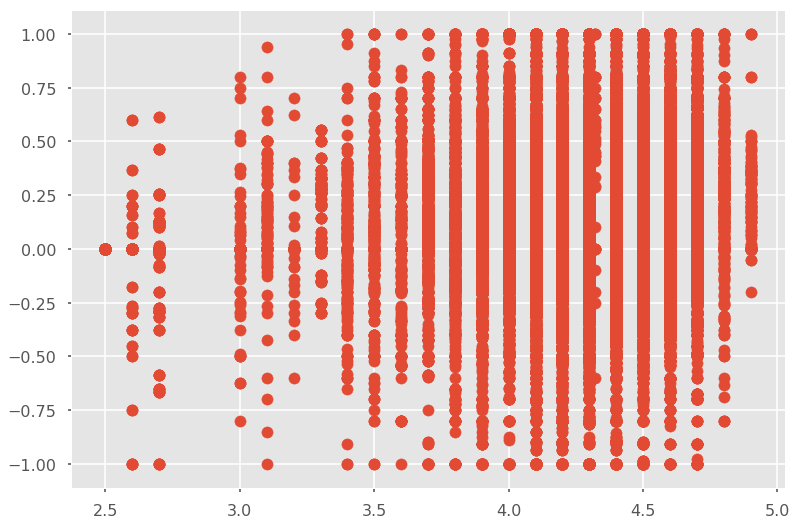

In [53]:

import matplotlib
matplotlib.pyplot.scatter(df['Rating'], df['Sentiment_Polarity'])

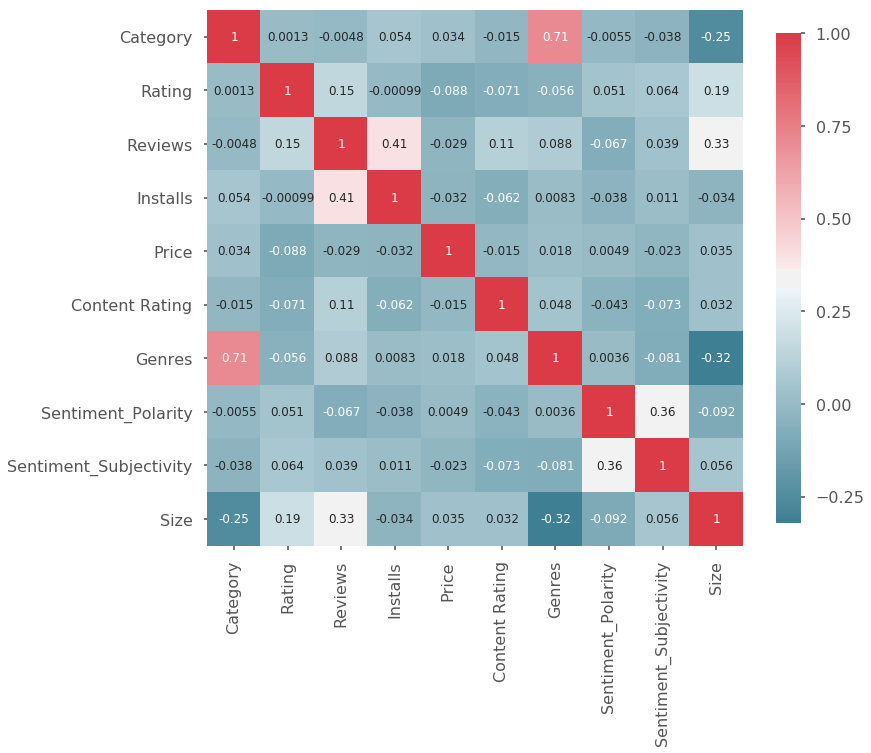

In [54]:
def plot_correlation_map( df ) :
    corr = df.corr() 
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={'shrink': 0.9 }, ax=ax, annot = True, annot_kws = {'fontsize':12} )

plot_correlation_map( df )

# Modeling 

## Linear regeression 

In [55]:
from sklearn.model_selection import train_test_split

y=df['Installs']
X = df[['Category','Genres','Price','Size']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 , random_state=0)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred=logreg.predict(X_test)
print('Accuracy={:.2f}'.format(logreg.score(X_test,y_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy=0.27


In [56]:
from sklearn.model_selection import train_test_split

y=df['Installs']
X = df[['Category']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 , random_state=0)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred=logreg.predict(X_test)
print('Accuracy={:.2f}'.format(logreg.score(X_test,y_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy=0.23


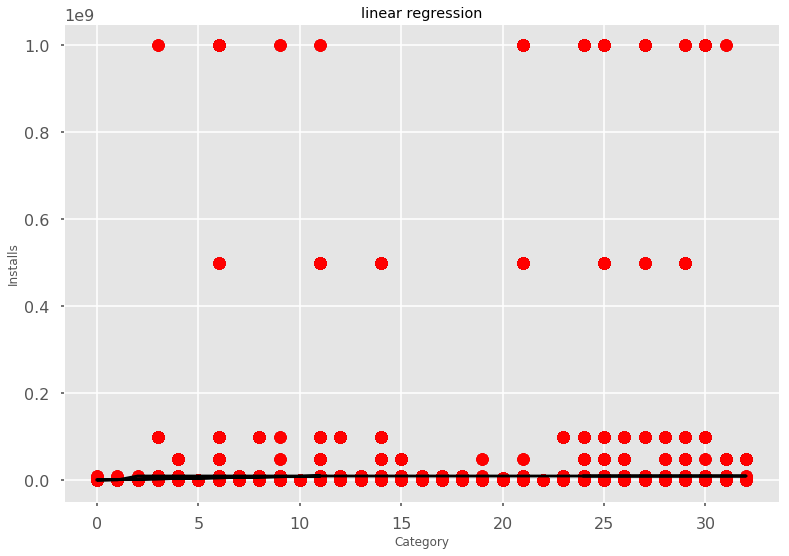

In [57]:
X=df['Category'].values[:,np.newaxis]
Y=df['Installs'].values
plt.scatter(X,Y,color ='r')
plt.title("linear regression")
plt.ylabel("Installs")
plt.xlabel("Category")

plt.plot(X, logreg.predict(X), color='k')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

y=df['Installs']
X = df[['Genres']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 , random_state=0)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred=logreg.predict(X_test)
print('Accuracy={:.2f}'.format(logreg.score(X_test,y_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy=0.25


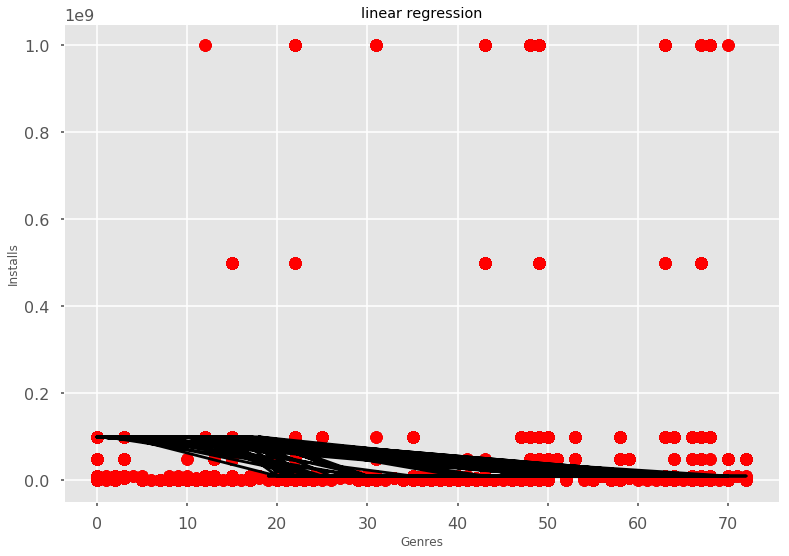

In [59]:
X=df['Genres'].values[:,np.newaxis]
Y=df['Installs'].values
plt.scatter(X,Y,color ='r')
plt.title("linear regression")
plt.ylabel("Installs")
plt.xlabel("Genres")

plt.plot(X, logreg.predict(X), color='k')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

y=df['Installs']
X = df[['Price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 , random_state=0)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred=logreg.predict(X_test)
print('Accuracy={:.2f}'.format(logreg.score(X_test,y_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy=0.23


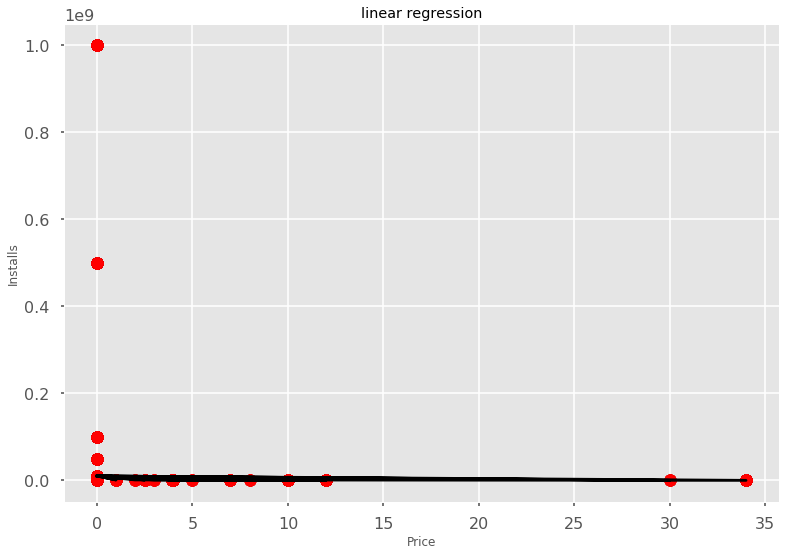

In [61]:
X=df['Price'].values[:,np.newaxis]
Y=df['Installs'].values
plt.scatter(X,Y,color ='r')
plt.title("linear regression")
plt.ylabel("Installs")
plt.xlabel("Price")

plt.plot(X, logreg.predict(X), color='k')
plt.show()

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X=df[['Category','Genres','Price','Size']]
Y=df['Installs'].values
X_Train, X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
model=LinearRegression()
model.fit(X_Train, y_Train)
predicted = model.predict(X_Test)
print("MSE :",metrics.mean_squared_error(y_Test,predicted))
print("R squared :" ,metrics.r2_score(y_Test,predicted))

MSE : 3.5780055321507652e+16
R squared : 0.007828947486806181


In [72]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
X=df[['Category','Genres','Price','Size']]
Y=df['Installs'].values
X_Train, X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
lg = LinearRegression()
poly = PolynomialFeatures(degree = 2) 
X_Train_fit=poly.fit_transform(X_Train)

X_Test_=poly.fit_transform(X_Test)
print("MSE :",metrics.mean_squared_error(y_Test,predicted))
print("R squared :" ,metrics.r2_score(y_Test,predicted))

MSE : 3.5780055321507652e+16
R squared : 0.007828947486806181


### K-NN

In [79]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y=df['Installs']
X = df[['Category','Genres','Price','Size']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 , random_state=30)
knn=KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy= " , accuracy_score(y_pred,y_test))

Accuracy=  0.7900379081237516


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(50,100) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print("Accuracy for k= ",k," is :" , accuracy_score(y_pred,y_test))

Accuracy for k=  50  is : 0.785187298740472
Accuracy for k=  51  is : 0.784372070272694
Accuracy for k=  52  is : 0.7835568418049158
Accuracy for k=  53  is : 0.7828638976073045
Accuracy for k=  54  is : 0.7803774507805813
Accuracy for k=  55  is : 0.7776464354135246
Accuracy for k=  56  is : 0.7749969428932458
Accuracy for k=  57  is : 0.7738556230383565
Accuracy for k=  58  is : 0.769331105042188
Accuracy for k=  59  is : 0.7628500387233522
Accuracy for k=  60  is : 0.7601597847796845
Accuracy for k=  61  is : 0.7527412057229038
Accuracy for k=  62  is : 0.7485835405372355
Accuracy for k=  63  is : 0.7434068397668446
Accuracy for k=  64  is : 0.7406758243997881
Accuracy for k=  65  is : 0.734724656585008
Accuracy for k=  66  is : 0.7335833367301187
Accuracy for k=  67  is : 0.7269392247177271
Accuracy for k=  68  is : 0.7257979048628378
Accuracy for k=  69  is : 0.7222108996046142
Accuracy for k=  70  is : 0.7211511025965027
Accuracy for k=  71  is : 0.7195614070843354
Accuracy for k

## Using confusion matrix to validate our model

In [66]:
confussion_matrix=pd.crosstab(y_test,y_pred,rownames=['actual'],colnames=['predicted'])
print(confussion_matrix)

predicted   1000        10000       50000       100000      500000      \
actual                                                                   
1000                67           0          12           9           0   
5000                 0           3           0           0           0   
10000                0         255           8          26          11   
50000                0          15         171          18          15   
100000               0          11           0         948          52   
500000               0           6          19          70         679   
1000000              0          25          19         110          48   
5000000              0          33           7          32          15   
10000000             0           0           0          52          65   
50000000             0           0           0           0           0   
100000000            0           0           0          12           0   
500000000            0           0    

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        1000       1.00      0.76      0.86        88
        5000       0.00      0.00      0.00        13
       10000       0.73      0.72      0.73       355
       50000       0.72      0.54      0.62       319
      100000       0.74      0.60      0.67      1568
      500000       0.77      0.52      0.62      1300
     1000000       0.68      0.69      0.68      3576
     5000000       0.65      0.75      0.70      3325
    10000000       0.71      0.61      0.66      5655
    50000000       0.71      0.80      0.75      1866
   100000000       0.79      0.86      0.83      5002
   500000000       1.00      0.55      0.71       662
  1000000000       0.41      0.78      0.54       804

   micro avg       0.71      0.71      0.71     24533
   macro avg       0.69      0.63      0.64     24533
weighted avg       0.72      0.71      0.71     24533



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Prediction of Installs 

In [80]:

Category=(input("Category name :"))
Genres=(input("Genres name :"))
Price=(input("Price in $ = :"))
Size=(input("Size in MB= :"))

Cat = []
Gen= []
Pr = []
Sz = []

Cat.append(int(Category))
Gen.append(int(Genres))
Pr.append(float(Price))
Sz.append(float(Size))
topred = pd.DataFrame()

topred['Category'] = Cat
topred['Genres']= Gen
topred['Price']= Pr
topred['Size']= Sz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


y_pred=knn.predict(topred)

print("\n")
print ("future Installs of Your App  :", y_pred )

Category name :0
Genres name :7
Price in $ = :0.0
Size in MB= :14.0


future Installs of Your App  : [500000]


## Prediction of Content Rating

In [81]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y=df['Content Rating']
X = df[['Category','Genres','Price','Size']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 , random_state=30)
knn=KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy= " , accuracy_score(y_pred,y_test))

Accuracy=  0.9359230424326418


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1,50) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print("Accuracy for k= ",k," is :" , accuracy_score(y_pred,y_test))

Accuracy for k=  1  is : 0.9286267476460278
Accuracy for k=  2  is : 0.9269147678636938
Accuracy for k=  3  is : 0.9312354787429177
Accuracy for k=  4  is : 0.9357192353156972
Accuracy for k=  5  is : 0.935393143928586
Accuracy for k=  6  is : 0.9351485753882526
Accuracy for k=  7  is : 0.935393143928586
Accuracy for k=  8  is : 0.9351893368116415
Accuracy for k=  9  is : 0.9351893368116415
Accuracy for k=  10  is : 0.934944768271308
Accuracy for k=  11  is : 0.9351893368116415
Accuracy for k=  12  is : 0.934944768271308
Accuracy for k=  13  is : 0.9351893368116415
Accuracy for k=  14  is : 0.934944768271308
Accuracy for k=  15  is : 0.9351893368116415
Accuracy for k=  16  is : 0.934944768271308
Accuracy for k=  17  is : 0.9359230424326418
Accuracy for k=  18  is : 0.9359230424326418
Accuracy for k=  19  is : 0.9361676109729752
Accuracy for k=  20  is : 0.934944768271308
Accuracy for k=  21  is : 0.9359230424326418
Accuracy for k=  22  is : 0.9359230424326418
Accuracy for k=  23  is : 

In [82]:
Category=(input("Category name :"))
Genres=(input("Genres name :"))
Price=(input("Price in $ = :"))
Size=(input("Size in MB = :"))

Catt = []
Gen= []
Pr = []
Sz = []

Catt.append(int(Category))
Gen.append(int(Genres))
Pr.append(float(Price))
Sz.append(float(Size))
topred = pd.DataFrame()

topred['Category'] = Catt
topred['Genres']= Gen
topred['Price']= Pr
topred['Size']= Sz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



y_pred=knn.predict(topred)

print("\n")
print ("Content Rating :",y_pred)

Category name :0
Genres name :7
Price in $ = :0.0
Size in MB = :14.0


Content Rating : [1]
